In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
# r2_score is used when multiple independent columns are used to create a model
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"Amazon data.csv")
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...","R3G3XFHPBFF0E8,R3C0BZCD32EIGW,R2EBVBCN9QPD9R,R...","Received the product without spanner,Excellent...","I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...","R3DDL2UPKQ2CK9,R2SYYU1OATVIU5,R1VM993161IYRW,R...","ok,everything was good couldn't return bcoz I ...","ok,got everything as mentioned but the measuri...",https:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [4]:
df.value_counts

<bound method DataFrame.value_counts of       product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category discounted_price  \
0     Computers&Accessories|Acc

In [5]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object

In [6]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [7]:
mode = df["rating_count"].mode()[0]
df["rating_count"] = df["rating_count"].fillna(mode)

In [8]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [9]:
df_category = df['category'].str.split('|', expand=True)

# Create mapping for known levels
category_mapping = {
    0: 'Main_Category',
    1: 'Department',
    2: 'Sub_Category_1',
    3: 'Sub_Category_2',
    4: 'Sub_Category_3',
    5: 'Sub_Category_4',
}

# Rename the columns accordingly
df_category.rename(columns=category_mapping, inplace=True)

In [10]:
df = pd.concat([df,df_category], axis = 1)
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_content,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,6
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,"1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43%,4,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,"1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59%,4,"1,090",SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,"I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,"2,280","3,045",25%,4.1,"4,118","230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,"ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...","2,219","3,080",28%,3.6,468,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4

In [11]:
df = df.rename(columns={6: "Sub_Category_5"})


In [12]:
df.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'Main_Category',
       'Department', 'Sub_Category_1', 'Sub_Category_2', 'Sub_Category_3',
       'Sub_Category_4', 'Sub_Category_5'],
      dtype='object')

In [13]:
# Categorical cols
list1 = ["product_name","product_id","user_id","review_id","Main_Category","Department","Sub_Category_1","Sub_Category_2","Sub_Category_3","Sub_Category_4","Sub_Category_5"]


In [14]:
for i in list1:
    df[i] = df[i].astype("category")


In [15]:
import numpy as np
df["discount_percentage"] = (
        df["discount_percentage"]
        .astype(str)
        .str.replace(r'[%]', '', regex=True)
    )

df["discounted_price"] = (
        df["discounted_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                        
    )

df["actual_price"] = (
        df["actual_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                  
    )
df["rating_count"] = (
        df["actual_price"]
        .astype(str)
        .str.replace(r'[,]', '', regex=True)                    
    )

mode_rating = df["rating"].mode()[0]  

df["rating"] = (
    df["rating"]
    .astype(str)
    .str.replace(r"[|]", mode_rating, regex=True)   

)


In [16]:
df

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,review_content,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399,1099,64,4.2,1099,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199,349,43,4,349,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199,1899,90,3.9,1899,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,"Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329,699,53,4.2,699,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,"Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154,399,61,4.2,399,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,"Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,379,919,59,4,919,SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...",...,"I received product without spanner,Excellent p...",https://m.media-amazon.com/images/I/41fDdRtjfx...,https://www.amazon.in/Noir-Aqua-Spanner-Purifi...,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,NaN,NaN,NaN
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,2280,3045,25,4.1,3045,"230 Volts, 400 watts, 1 Year","AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...",...,"ok,got everything as mentioned but the measuri...",https://m.media-amazon.com/images/I/41gzDxk4+k...,https://www.amazon.in/Prestige-Delight-PRWO-1-...,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,NaN,NaN,NaN
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",2219,3080,28,3.6,3080,International design and styling|Two heat sett...,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...",...,"plastic but cool body ,u have to find stu

In [17]:
df["discounted_price"] = df["discounted_price"].astype("float")
df["actual_price"] = df["actual_price"].astype("float")
df["discount_percentage"] = df["discount_percentage"].astype("int")
df["rating_count"] = df["rating_count"].astype("float")


In [18]:
df["rating"] = df["rating"].astype("float")

In [19]:
categ = df.select_dtypes(exclude = 'number')
numerical = df.select_dtypes(include = 'number')

In [20]:
df.dtypes

product_id             category
product_name           category
category                 object
discounted_price        float64
actual_price            float64
discount_percentage       int32
rating                  float64
rating_count            float64
about_product            object
user_id                category
user_name                object
review_id              category
review_title             object
review_content           object
img_link                 object
product_link             object
Main_Category          category
Department             category
Sub_Category_1         category
Sub_Category_2         category
Sub_Category_3         category
Sub_Category_4         category
Sub_Category_5         category
dtype: object

In [21]:
df.dtypes

product_id             category
product_name           category
category                 object
discounted_price        float64
actual_price            float64
discount_percentage       int32
rating                  float64
rating_count            float64
about_product            object
user_id                category
user_name                object
review_id              category
review_title             object
review_content           object
img_link                 object
product_link             object
Main_Category          category
Department             category
Sub_Category_1         category
Sub_Category_2         category
Sub_Category_3         category
Sub_Category_4         category
Sub_Category_5         category
dtype: object

In [22]:
from sklearn.preprocessing import StandardScaler
def scaling_numeric():
    data_types = ["int32","float64"]
    new_df = df.select_dtypes(include = data_types)
    scaler_obj = StandardScaler()
    df_scaled = pd.DataFrame(scaler_obj.fit_transform(new_df.to_numpy()), columns = new_df.columns)
    return df_scaled

In [23]:
df_scaled = scaling_numeric()
df_scaled

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,-0.392731,-0.399774,0.754029,0.354792,-0.399774
1,-0.421541,-0.468764,-0.216911,-0.331373,-0.468764
2,-0.421541,-0.326185,1.956146,-0.674456,-0.326185
3,-0.402814,-0.436569,0.245441,0.354792,-0.436569
4,-0.428024,-0.464165,0.615323,0.354792,-0.464165
...,...,...,...,...,...
1460,-0.395612,-0.416332,0.522853,-0.331373,-0.416332
1461,-0.121769,-0.220768,-1.049146,0.011709,-0.220768
1462,-0.130556,-0.217548,-0.910440,-1.703704,-0.217548
1463,-0.248679,-0.327013,-1.002910,-0.331373,-0.327013


In [24]:
from sklearn import preprocessing
label_obj = preprocessing.LabelEncoder()
for col in categ:
    categ[col] = label_obj.fit_transform(categ[col])

In [25]:
categ

,product_id,product_name,category,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,346,1158,10,474,623,522,817,881,604,1118,1308,1,1,7,12,50,14,7
1,848,134,10,279,88,207,1025,7,413,1248,157,1,1,7,12,50,14,7
2,819,1023,10,1250,849,482,827,422,674,876,1160,1,1,7,12,50,14,7
3,643,1264,10,1010,254,614,786,376,269,518,380,1,1,7,12,50,14,7
4,588,829,10,1189,17,1139,114,44,120,1209,919,1,1,7,12,50,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,673,696,192,902,1050,646,804,868,425,595,771,4,17,70,131,56,14,7
1461,201,850,172,76,425,537,779,1167,1184,612,946,4,17,56,97,56,14,7
1462,27,164,138,520,865,596,288,1181,1186,1088,201,4,11,50,49,56,14,7
1463,61,462,129,395,300,885,749,212,375,1130,548,4,11,21,35,56,14,7


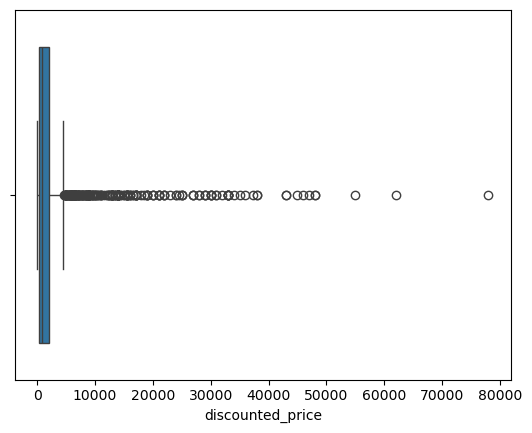

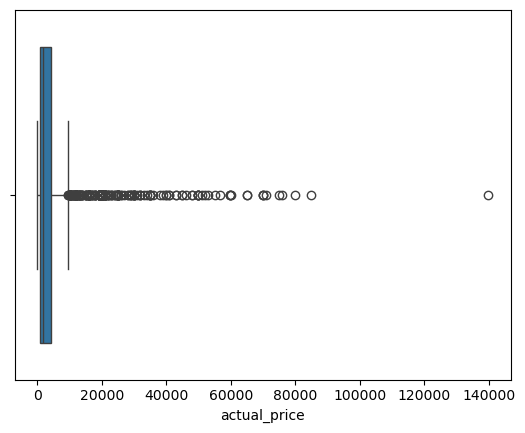

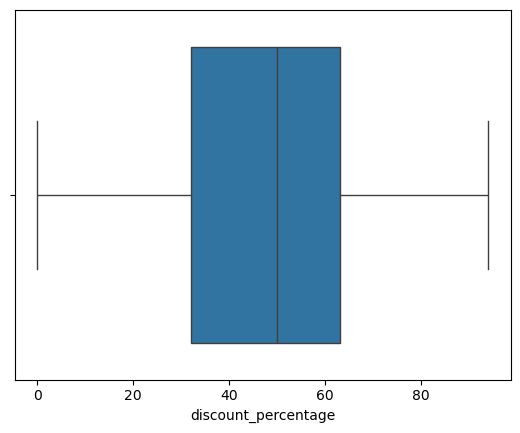

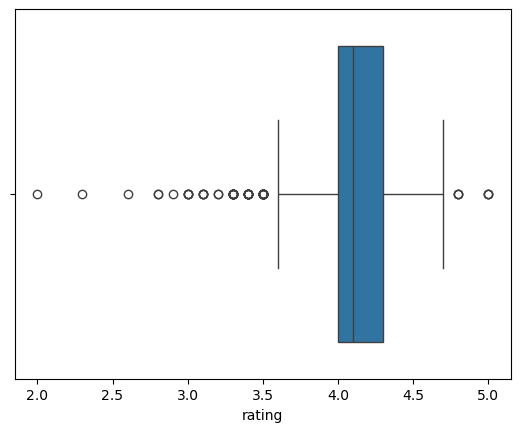

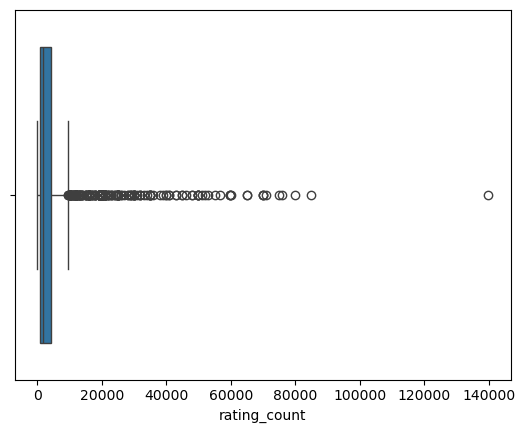

In [26]:
for col in numerical.columns:
    sns.boxplot(x = df[col])
    plt.show()

In [27]:
no_outlier = df_scaled.copy()

def outlier_cleanup(col):
    # Calculate IQR and outlier fences
    q1 = no_outlier[col].quantile(0.25)
    q3 = no_outlier[col].quantile(0.75)
    iqr = q3 - q1
    lf = q1 - (1.5 * iqr)  # lower fence
    uf = q3 + (1.5 * iqr)  # upper fence

    # Check column type for proper handling of integer and float types
    col_type = str(no_outlier[col].dtype)

    # Apply outlier treatment
    if col_type in ["int64"]:
        # For integer columns, round the fence values and cast them to integers
        no_outlier.loc[no_outlier[col] < lf, col] = int(round(lf))
        no_outlier.loc[no_outlier[col] > uf, col] = int(round(uf))
    else:
        # For float columns, directly assign the fence values
        no_outlier.loc[no_outlier[col] < lf, col] = lf
        no_outlier.loc[no_outlier[col] > uf, col] = uf

In [28]:
for col in df_scaled.columns:
    outlier_cleanup(col)

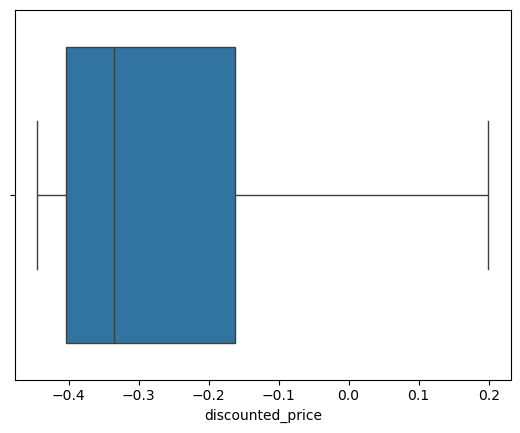

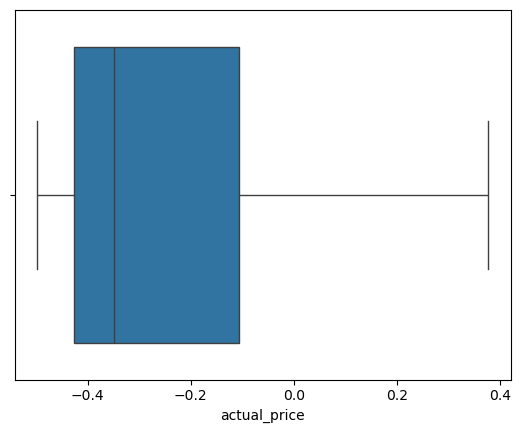

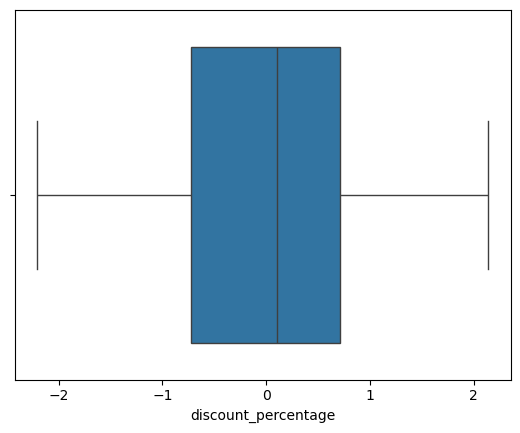

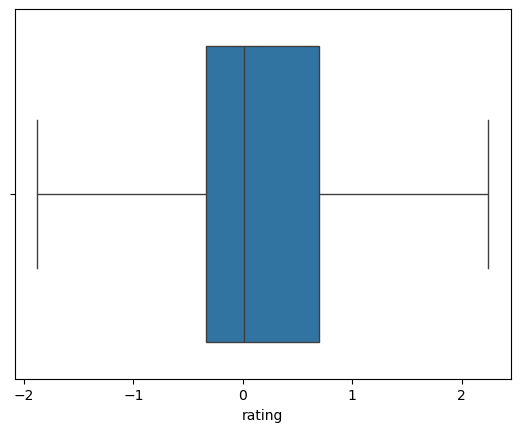

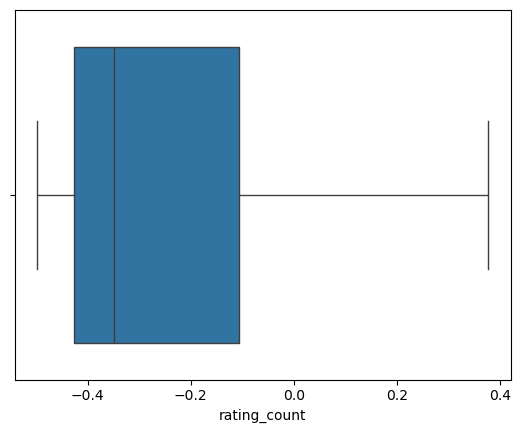

In [29]:
for col in numerical.columns:
    sns.boxplot(x = no_outlier[col])
    plt.show()

In [30]:
final_df = pd.concat([no_outlier,categ], axis = 1)
final_df

,discounted_price,actual_price,discount_percentage,rating,rating_count,product_id,product_name,category,about_product,user_id,...,review_content,img_link,product_link,Main_Category,Department,Sub_Category_1,Sub_Category_2,Sub_Category_3,Sub_Category_4,Sub_Category_5
0,-0.392731,-0.399774,0.754029,0.354792,-0.399774,346,1158,10,474,623,...,604,1118,1308,1,1,7,12,50,14,7
1,-0.421541,-0.468764,-0.216911,-0.331373,-0.468764,848,134,10,279,88,...,413,1248,157,1,1,7,12,50,14,7
2,-0.421541,-0.326185,1.956146,-0.674456,-0.326185,819,1023,10,1250,849,...,674,876,1160,1,1,7,12,50,14,7
3,-0.402814,-0.436569,0.245441,0.354792,-0.436569,643,1264,10,1010,254,...,269,518,380,1,1,7,12,50,14,7
4,-0.428024,-0.464165,0.615323,0.354792,-0.464165,588,829,10,1189,17,...,120,1209,919,1,1,7,12,50,14,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1460,-0.395612,-0.416332,0.522853,-0.331373,-0.416332,673,696,192,902,1050,...,425,595,771,4,17,70,131,56,14,7
1461,-0.121769,-0.220768,-1.049146,0.011709,-0.220768,201,850,172,76,425,...,1184,612,946,4,17,56,97,56,14,7
1462,-0.130556,-0.217548,-0.910440,-1.703704,-0.217548,27,164,138,520,865,...,1186,1088,201,4,11,50,49,56,14,7
1463,-0.248679,-0.327013,-1.002910,-0.331373,-0.327013,61,462,129,395,300,...,375,1130,548,4,11,21,35,56,14,7


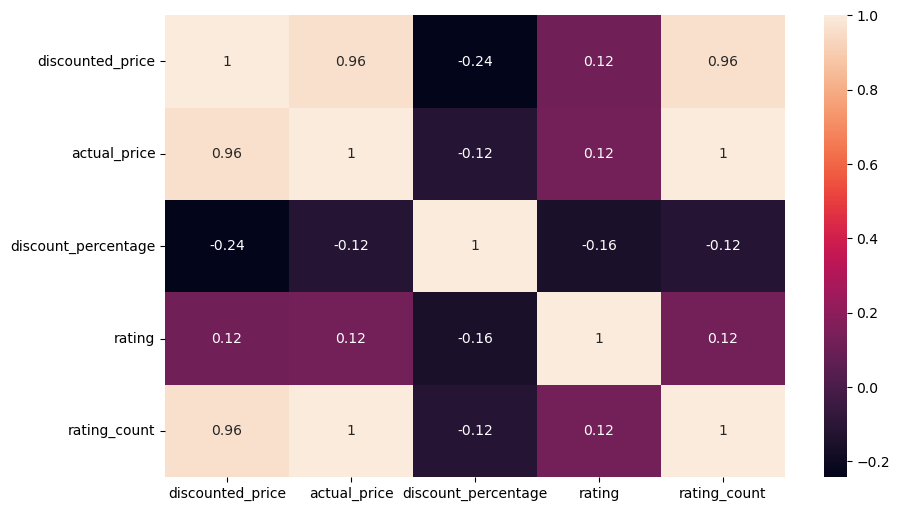

In [31]:
fig,ax =  plt.subplots(figsize=(10,6))
sns.heatmap(numerical.corr(),annot = True)
plt.show()

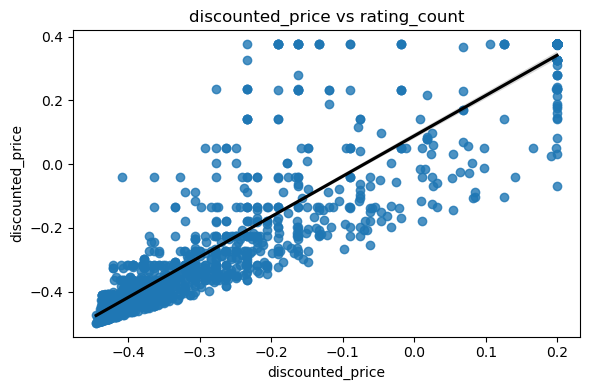

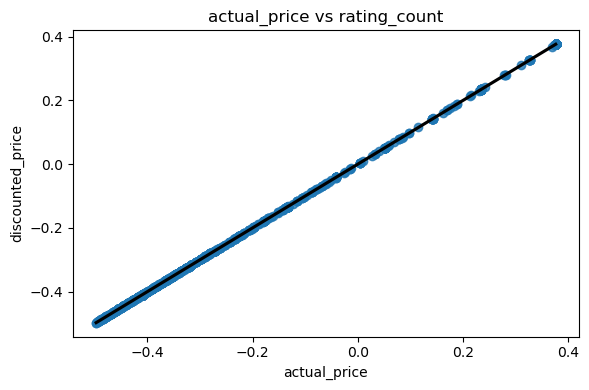

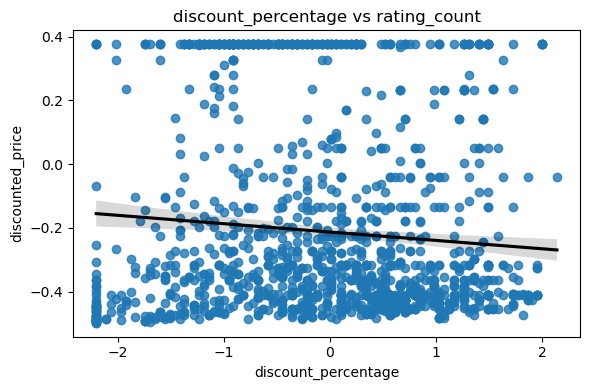

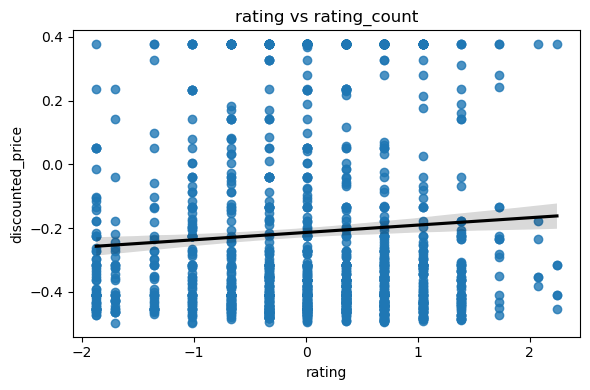

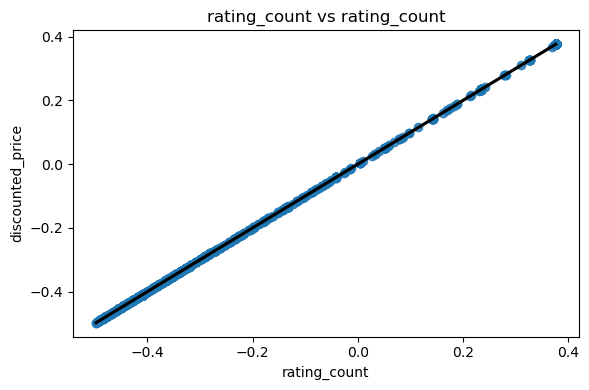

In [32]:

for i in numerical.columns:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=i, y="rating_count", data=final_df, line_kws={"color": "black"})
    plt.xlabel(i)
    plt.ylabel("discounted_price")
    plt.title(f"{i} vs rating_count")
    plt.tight_layout()
    plt.show();

In [33]:
x_li =final_df[["discounted_price","Sub_Category_1","Sub_Category_2","Main_Category","Sub_Category_3"]].to_numpy().reshape(-1,5)


In [ ]:
y = m(x1+x2+x3+x4+x5)+c

In [34]:
y_li = np.array(no_outlier['rating_count']).reshape(-1,1)

In [35]:
x_train , x_test , y_train , y_test = train_test_split(x_li,y_li,train_size = 0.8,random_state = 42)

In [36]:
first_model = LinearRegression().fit(x_train,y_train)

In [37]:
r_sq2 = first_model.score(x_train,y_train)
r_sq2

0.8876485058250895

In [38]:
y_pred = first_model.predict(x_test)

In [39]:
mse_new = mean_squared_error(y_test,y_pred)
mse_new

0.007971653846683061

In [40]:
r2 = r2_score(y_test,y_pred)
r2

0.9014061230210236

In [41]:
first_model.intercept_

array([0.0656035])

In [42]:
first_model.coef_

array([[ 1.20481441e+00,  4.35895777e-04,  7.09243817e-04,
        -2.01854959e-02, -1.74636140e-04]])

In [43]:
df_res = pd.DataFrame()

In [44]:
df_res["y_predicted"] = pd.DataFrame(y_pred) # Assinging new predicted values to new column in the df
df_res["y_predicted"]

0      0.403365
1     -0.359766
2     -0.389191
3     -0.404920
4     -0.220921
         ...   
288   -0.401882
289    0.356945
290   -0.365702
291   -0.371534
292   -0.219734
Name: y_predicted, Length: 293, dtype: float64

In [45]:
df_res["y_actual"] = pd.DataFrame(y_test)
df_res["y_actual"]

0      0.376457
1     -0.454966
2     -0.408973
3     -0.445768
4     -0.353781
         ...   
288   -0.390483
289    0.376457
290   -0.408973
291   -0.354149
292    0.326922
Name: y_actual, Length: 293, dtype: float64

In [46]:
df_res["residual"] = abs(df_res["y_predicted"] - df_res["y_actual"])
df_res

,y_predicted,y_actual,residual
0,0.403365,0.376457,0.026908
1,-0.359766,-0.454966,0.095200
2,-0.389191,-0.408973,0.019781
3,-0.404920,-0.445768,0.040848
4,-0.220921,-0.353781,0.132860
...,...,...,...
288,-0.401882,-0.390483,0.011398
289,0.356945,0.376457,0.019512
290,-0.365702,-0.408973,0.043271
291,-0.371534,-0.354149,0.017385


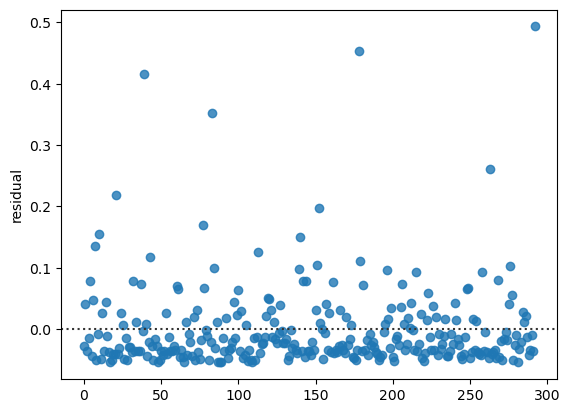

In [47]:
sns.residplot(x=df_res.index, y ="residual" , data = df_res);

# As per the visual Homoscedasticity is followed
# Assumption normality of residuants

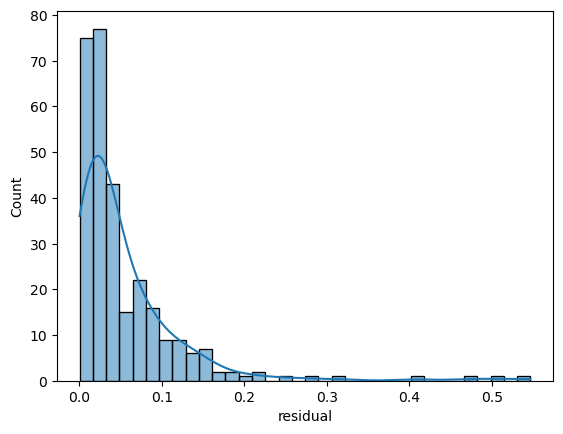

In [49]:
sns.histplot(df_res["residual"],kde = True);

# This assumption fails because errors are not normally distriburted

In [51]:
import warnings
warnings.filterwarnings("ignore")

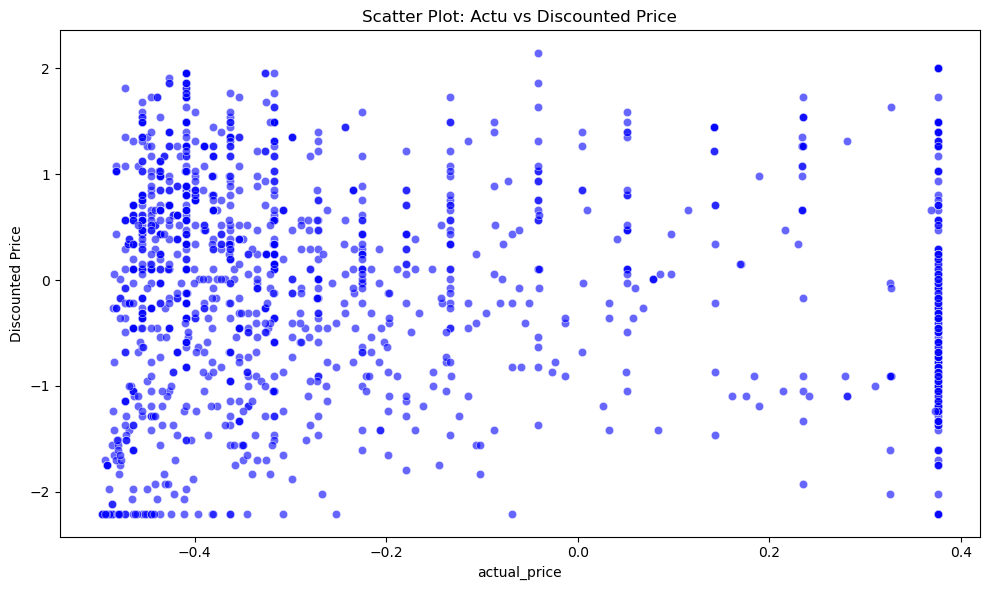

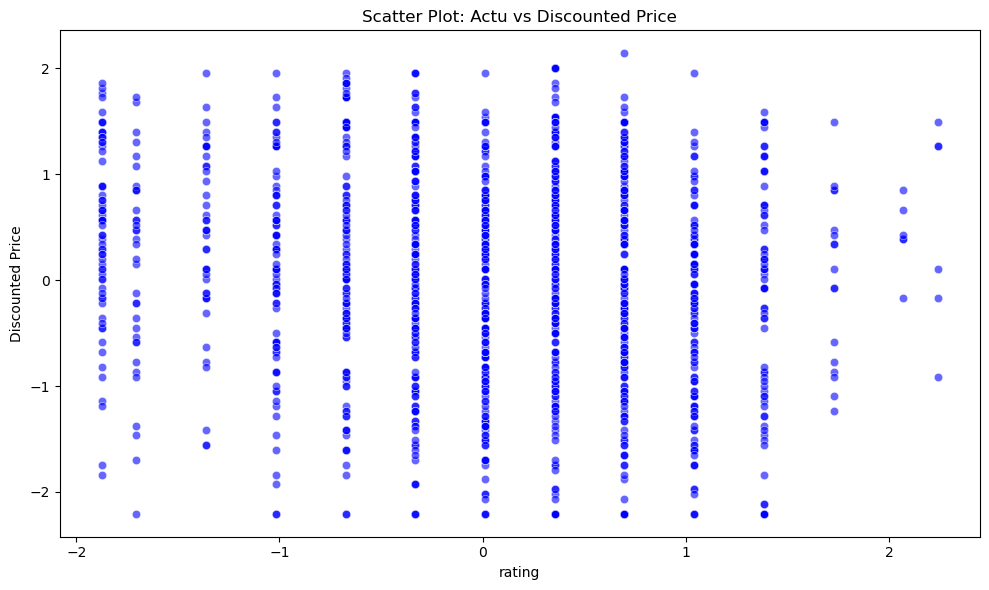

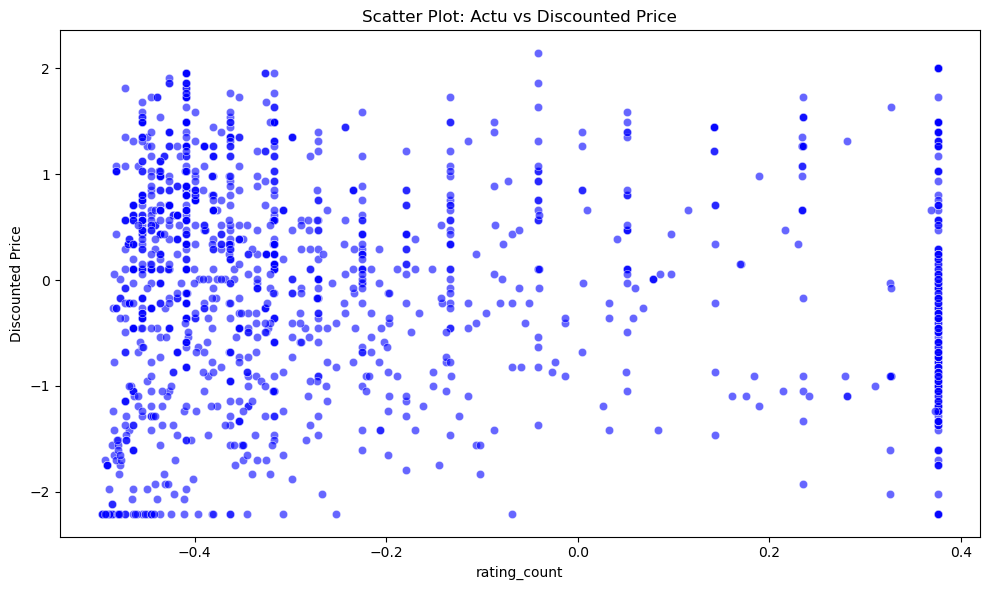

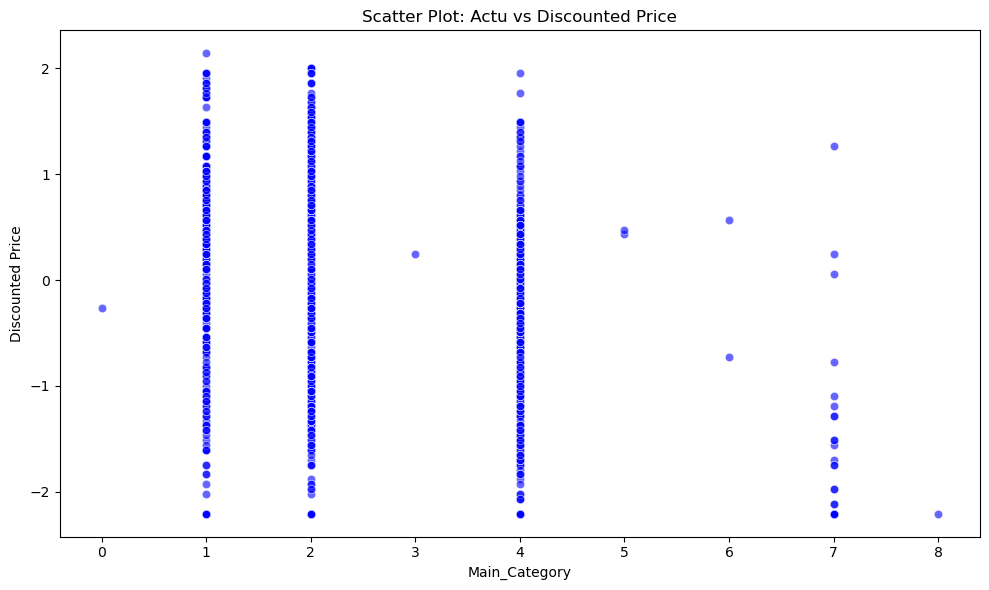

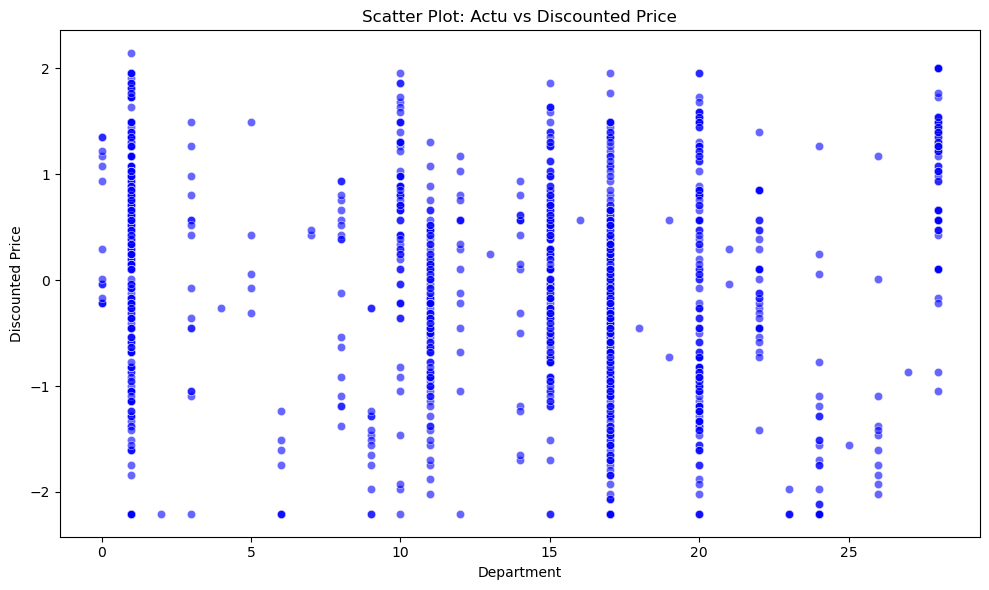

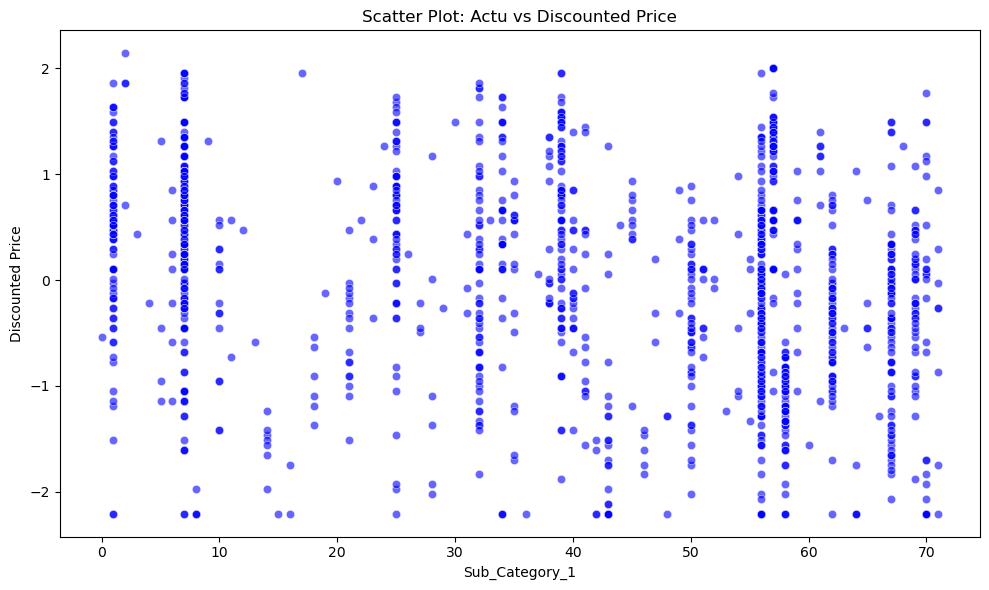

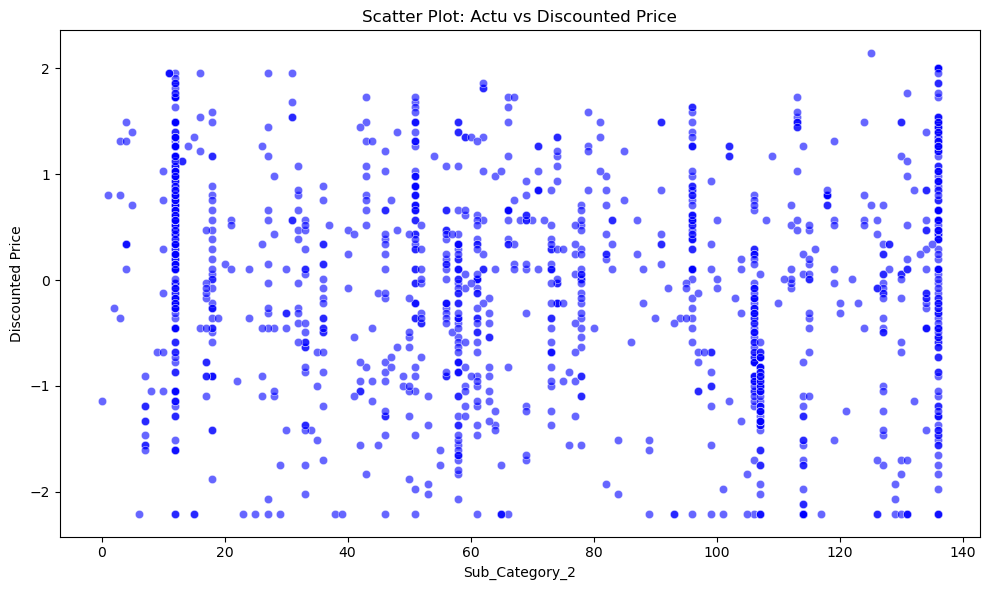

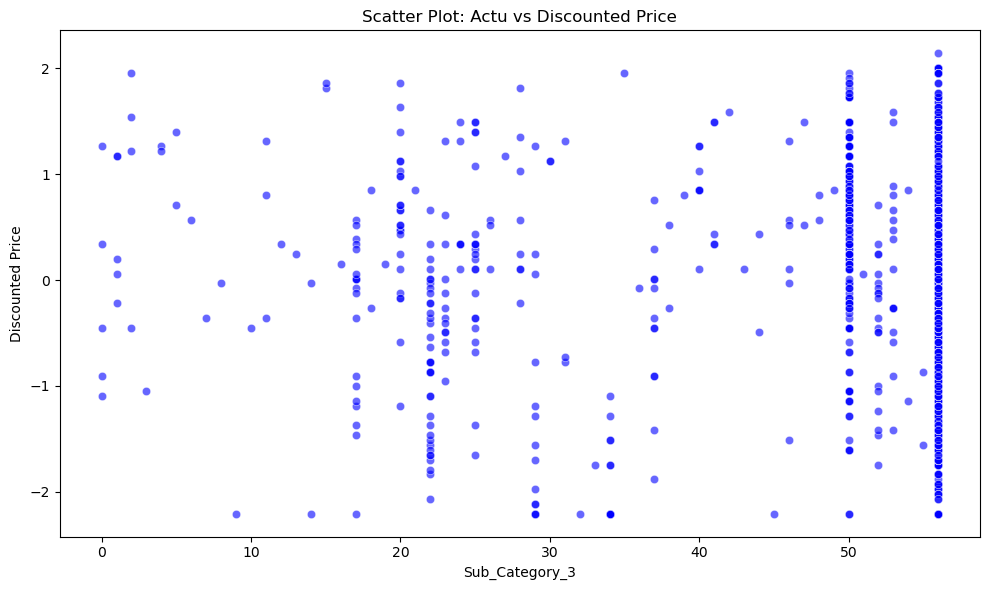

In [52]:
# KMeans
l = ["actual_price","rating","rating_count","Main_Category","Department","Sub_Category_1","Sub_Category_2","Sub_Category_3"]
for i in l:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=final_df, x=i, y='discount_percentage', alpha=0.6, color='blue')
    plt.title('Scatter Plot: Actu vs Discounted Price')
    plt.xlabel(i)
    plt.ylabel('Discounted Price')
    plt.tight_layout()
    plt.show();

In [53]:
x_k = final_df[["discounted_price"]]

In [54]:
err = []
mycluster = np.arange(2,11)
for k in mycluster:
  temp = KMeans(n_clusters = k)
  temp.fit(x_k)
  err.append(temp.inertia_)

In [55]:
err

[11.716994298494733,
 4.083911949613952,
 2.1250603832423627,
 1.426237364449725,
 0.8488601847815078,
 0.5987519743257376,
 0.441712044556249,
 0.3577466686967835,
 0.3179748899194624]

Text(0, 0.5, 'value received from .inertia_')

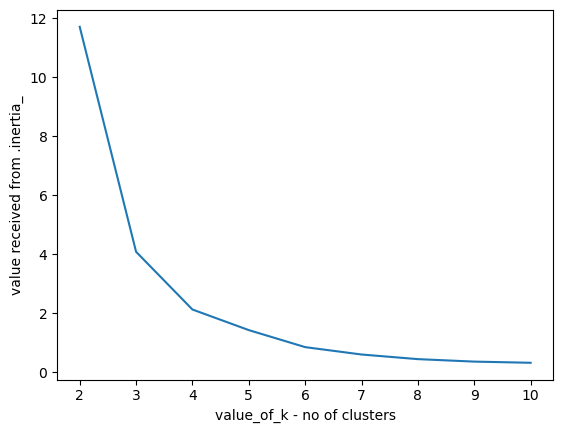

In [56]:
plt.plot(mycluster,err)
plt.xlabel("value_of_k - no of clusters")
plt.ylabel("value received from .inertia_")

In [57]:
# Lets take k as 2

In [58]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [59]:
for j in mycluster:
  temp_model = KMeans(n_clusters=j,random_state=0)
  cluster_labels = temp_model.fit_predict(x_k)
  silhouette_avg = silhouette_score(x_k,cluster_labels)*100
  print("for clusters  = ",j,"silhouette is", silhouette_avg)
  print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x_k,temp_model.labels_))
  print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x_k,temp_model.labels_))
  print()


for clusters  =  2 silhouette is 77.31118616089616
for clusters  =  2 davies_bouldin_score is 0.3432396524195835
for clusters  =  2 calinski_harabasz_score is 7171.020954421522

for clusters  =  3 silhouette is 70.93817964649615
for clusters  =  3 davies_bouldin_score is 0.4157544266572404
for clusters  =  3 calinski_harabasz_score is 11646.302288677694

for clusters  =  4 silhouette is 69.74672924942
for clusters  =  4 davies_bouldin_score is 0.4209946464335174
for clusters  =  4 calinski_harabasz_score is 15506.39514218082

for clusters  =  5 silhouette is 68.95031558621973
for clusters  =  5 davies_bouldin_score is 0.438225472881281
for clusters  =  5 calinski_harabasz_score is 18691.92067266952

for clusters  =  6 silhouette is 67.31283624571847
for clusters  =  6 davies_bouldin_score is 0.4518593401385958
for clusters  =  6 calinski_harabasz_score is 21301.943270795524

for clusters  =  7 silhouette is 62.64142192749467
for clusters  =  7 davies_bouldin_score is 0.4828142676659426

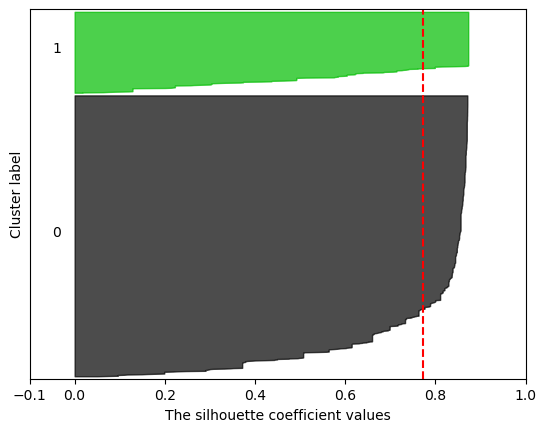

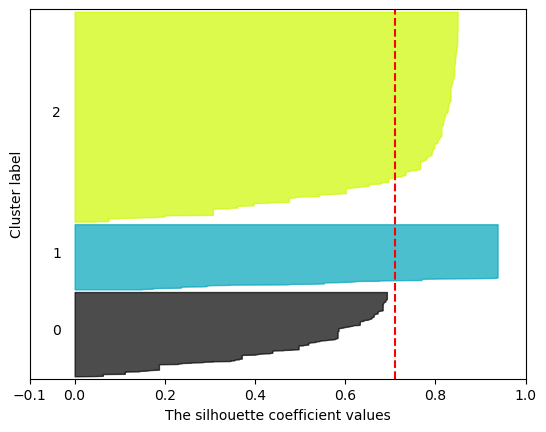

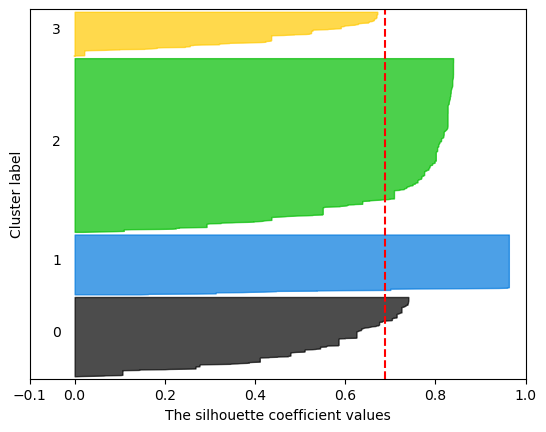

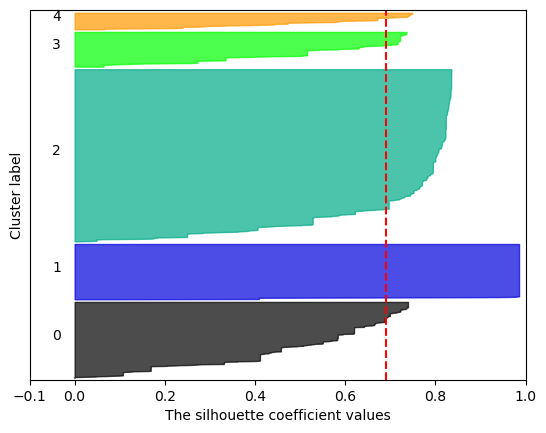

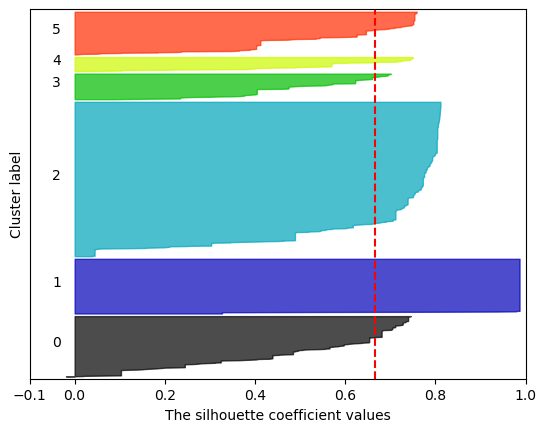

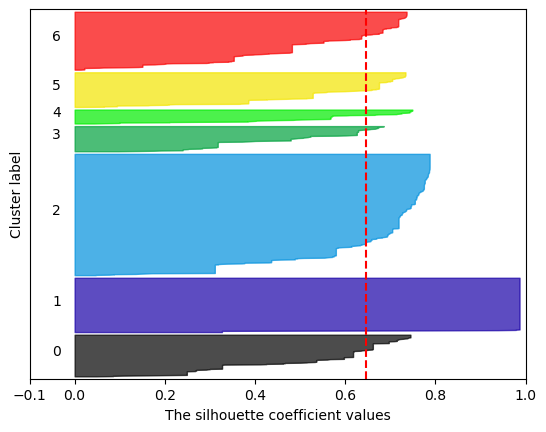

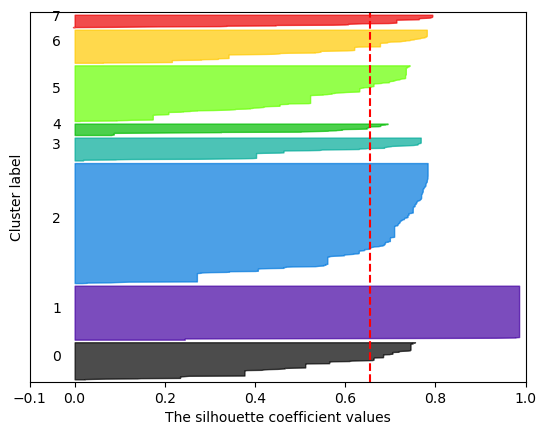

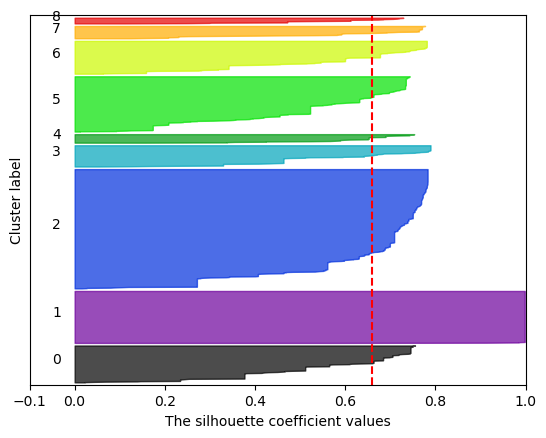

In [60]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
range_n_clusters = range(2,10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_k) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(x_k)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_k, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    sil_avg = silhouette_score(x_k,cluster_labels)
    ax1.axvline(x=sil_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # axline line is used for treshold
    # axvline kine is used as vertical treshold
plt.show();

In [61]:
final_km = KMeans(n_clusters=2,random_state=0)
final_km.fit(x_k)
final_centroid = final_km.cluster_centers_
final_labels = final_km.labels_ # Final model
clusters = final_km.fit_predict(x_k)
final_df['clusters'] = clusters
df['clusters'] = clusters
label_map = {0:"Less Discount Price",
    1:"More Discount Price"}
           
final_df["cluster_label"] = final_df["clusters"].map(label_map)
df["cluster_label"] = df["clusters"].map(label_map)


In [62]:
j = 2 # No of clusers required are 2
print("for clusters  = ",j,"silhouette is",round(silhouette_score(x_k,final_km.labels_),2) )
print("for clusters  = ",j,"davies_bouldin_score is", davies_bouldin_score(x_k,final_km.labels_))
print("for clusters  = ",j,"calinski_harabasz_score is", calinski_harabasz_score(x_k,final_km.labels_))
print() 

for clusters  =  2 silhouette is 0.77
for clusters  =  2 davies_bouldin_score is 0.3432396524195835
for clusters  =  2 calinski_harabasz_score is 7171.020954421522



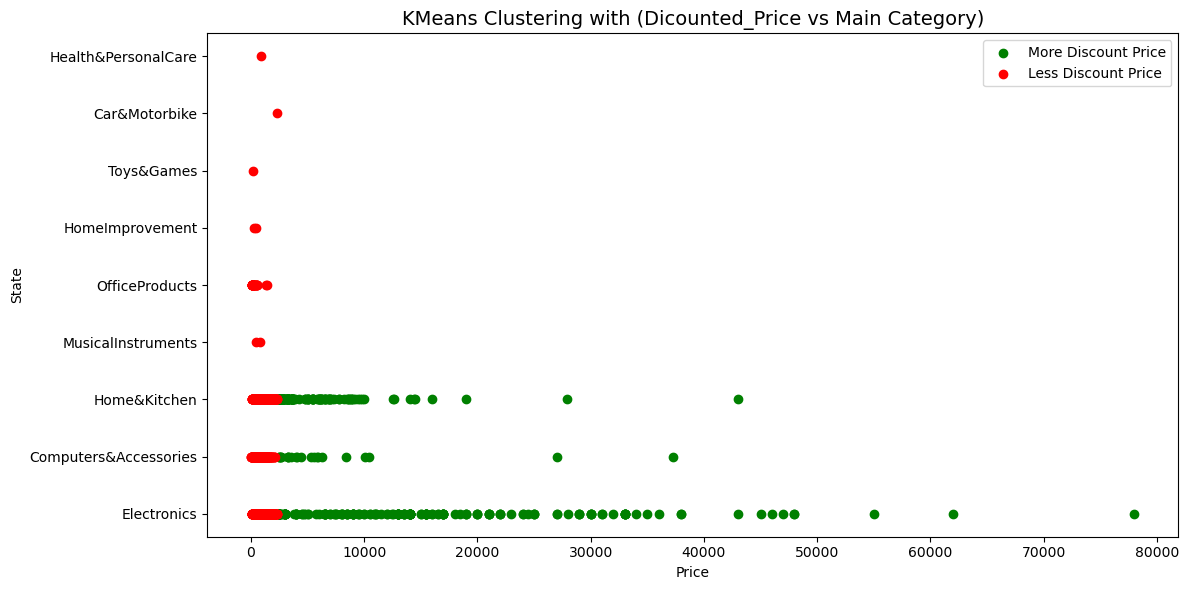

In [64]:
segments = ["More Discount Price","Less Discount Price"]
colors = ["Green","Red"]

plt.figure(figsize=(12, 6))  # Adjust the figure size for better readability

# Ensure k matches the number of clusters (should be 2 here)
for i in range(len(segments)):
    plt.scatter(
        df.loc[final_df.clusters == i, 'discounted_price'],
        df.loc[final_df.clusters == i, 'Main_Category'],
        c=colors[i],
        label=segments[i]
    )

# Add labels and formatting
plt.title('KMeans Clustering with (Dicounted_Price vs Main Category)', fontsize=14)
plt.xlabel('Price')
plt.ylabel('State')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show();